<a href="https://colab.research.google.com/github/sasha-schaps/sasha-schaps.github.io/blob/main/Sasha_Schaps_E_news_Express_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## <b>Problem Statement</b>
E-News Express, a digital news platform, is aiming to expand its subscriber base by increasing user engagement and conversions. To achieve this, the company tracks user behavior on its website. The design team developed a new landing page featuring improved layout and more relevant content to encourage more sign-ups.

To evaluate its effectiveness, the data science team conducted a controlled experiment involving 100 randomly selected users, split evenly into two groups:

* One group saw the old landing page (control),
* The other group interacted with the new landing page (treatment).

The goal is to analyze user behavior and conversion data to determine whether the new landing page leads to better engagement and higher conversion rates.

##<b>Objectives</b>
We aim to answer the following business questions:

* <b>Engagement:</b> Do users spend more time on the new landing page than on the existing one?
* <b>Conversion Rate:</b> Is the conversion rate (proportion of users who subscribe) higher for the new landing page?
* <b>Language Dependency:</b> Is the conversion status dependent on the preferred language of the user?
* <b>Language vs Engagement:</b> Is the time spent on the new landing page the same across different language users?

##<b>Data Dictionary</b>
* user_id: Unique identifier for each user visiting the website
* group:	Indicates the experimental group: control (old page) or treatment (new page)
* landing_page: Specifies whether the user saw the old or new landing page
* time_spent_on_the_page: Time (in minutes) the user spent on the landing page
* converted: Whether the user subscribed (yes) or not (no)
* language_preferred: Language selected by the user to view the landing page (English, French, Spanish)

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Reading the Data into a DataFrame

In [ ]:
# Import the csv file
import csv
filepath = '/content/abtest (1).csv'
df = pd.read_csv(filepath)
print("Dataset loaded successfully.")

Dataset loaded successfully.


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Explore the dataset
df.head()
print("First few rows of the dataset:")
print(df.head())
print("Last few rows of the dataset:")
print(df.tail())
print("Shape of the dataset:")
print(df.shape)
print("Statistical summary for the variables:")
print(df.describe())
df.dtypes # Access dtypes as an attribute
df.describe()
# Check if 'categorial_column' exists before accessing
if 'categorial_column' in df.columns:
    df['categorial_column'].value_counts()
# Check if 'numeric_column' exists before accessing
if 'numeric_column' in df.columns:
    df['numeric_column'].hist()

# Check for Missing Values
# Assuming you want to check missing values for the entire DataFrame
missing_count = df.isnull().sum()
print("Missing Values Count:")
print(missing_count)

# Check for Duplicates
# Assuming you want to check duplicates for the entire DataFrame
duplicate_count = df.duplicated().sum()
print("Duplicate Count:")
print(duplicate_count)

# Determine Variable Type and Analyze Accordingly
# Assuming you want to analyze a specific column, replace 'column_name'
# with the actual column name
column_name = 'your_column_name'
if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
  print("Type: Numerical")
# Descriptive Statistics
print("Descriptive Statistics:")
print(df[column_name].describe())
# Distribution Visualize
print("\nDistribution Visualize:")

First few rows of the dataset:
   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  
Last few rows of the dataset:
    user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99 

KeyError: 'your_column_name'

### Univariate Analysis

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


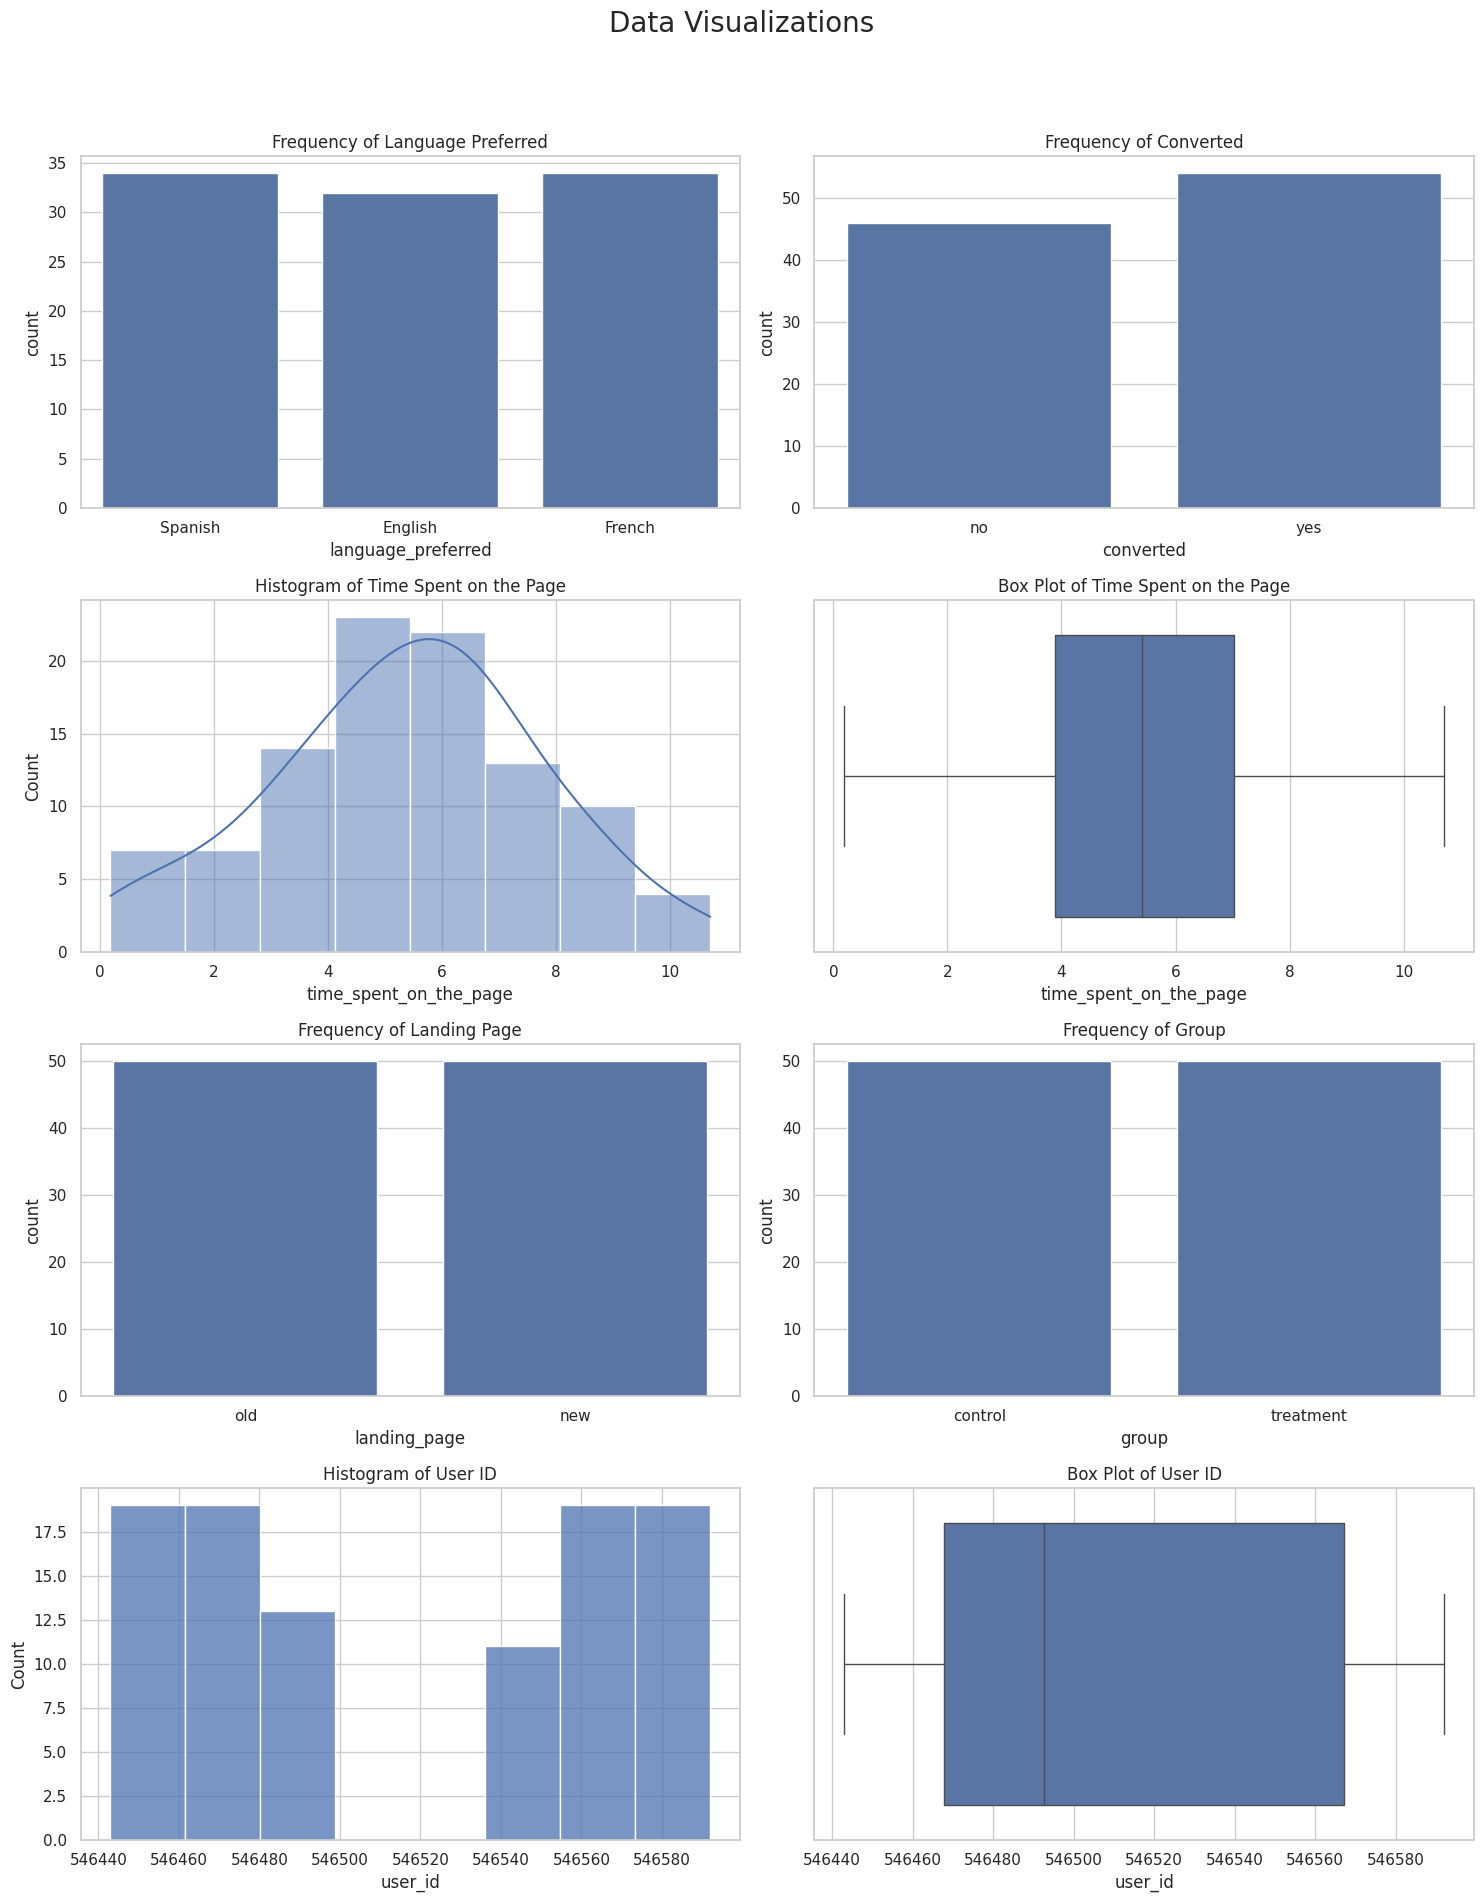

In [ ]:
print('Dataset Info')
df.info()
# Set style for plots
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle("Data Visualizations", fontsize=20)

# Frequency of Categories in Language Preferred
sns.countplot(x="language_preferred", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Frequency of Language Preferred")

# Frequency of Categories in Converted
sns.countplot(x="converted", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Frequency of Converted")

# Histogram of Time Spent on the Page
sns.histplot(df["time_spent_on_the_page"], kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Histogram of Time Spent on the Page")

# Box Plot of Time Spent on the Page
sns.boxplot(x=df["time_spent_on_the_page"], ax=axs[1, 1])
axs[1, 1].set_title("Box Plot of Time Spent on the Page")

# Frequency of Categories in Landing Page
sns.countplot(x="landing_page", data=df, ax=axs[2, 0])
axs[2, 0].set_title("Frequency of Landing Page")

# Frequency of Categories in Group
sns.countplot(x="group", data=df, ax=axs[2, 1])
axs[2, 1].set_title("Frequency of Group")

# Histogram of User ID
sns.histplot(df["user_id"], kde=False, ax=axs[3, 0])
axs[3, 0].set_title("Histogram of User ID")

# Box Plot of User ID
sns.boxplot(x=df["user_id"], ax=axs[3, 1])
axs[3, 1].set_title("Box Plot of User ID")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Bivariate Analysis

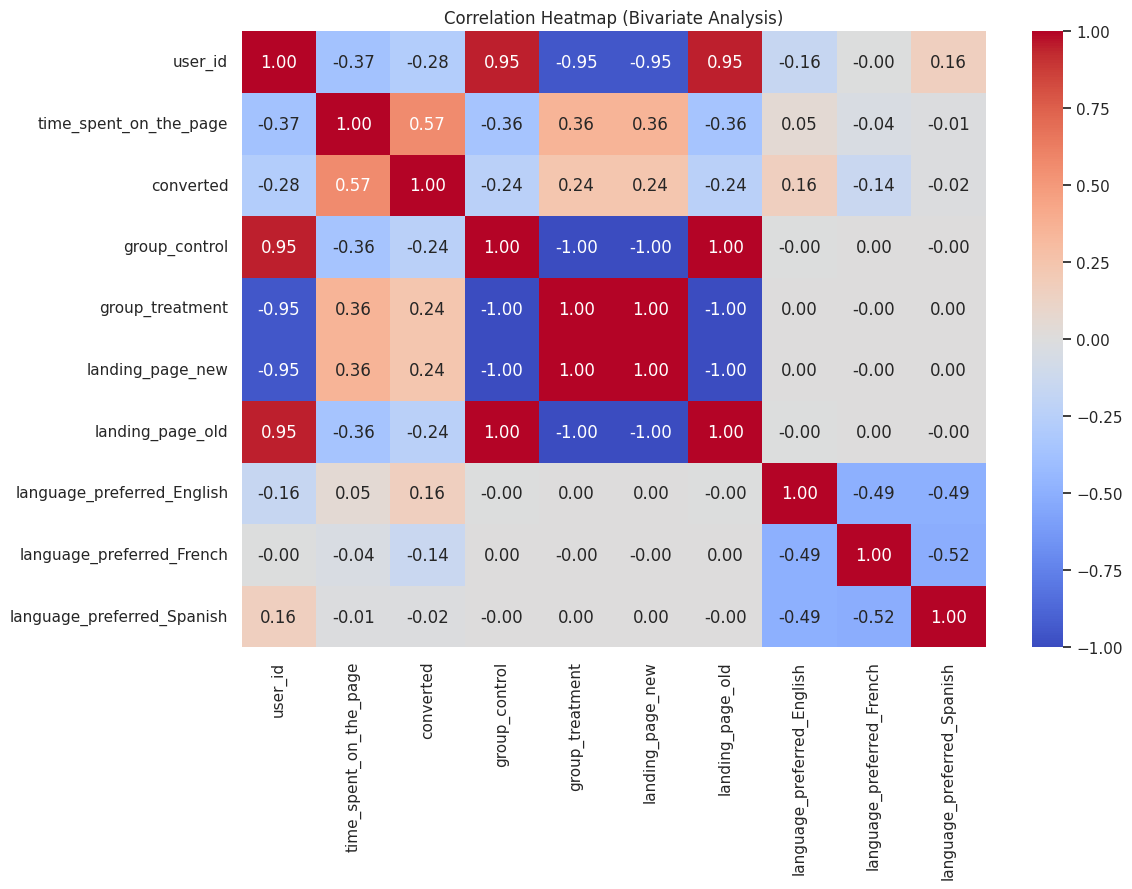

In [ ]:
# Convert categorical variables to numeric for correlation matrix
df_encoded = df.copy()
df_encoded['converted'] = df_encoded['converted'].map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['group', 'landing_page', 'language_preferred'])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Bivariate Analysis)")
plt.show()


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<ipython-input-33-c55df5fe4758>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=df, palette="Set2")


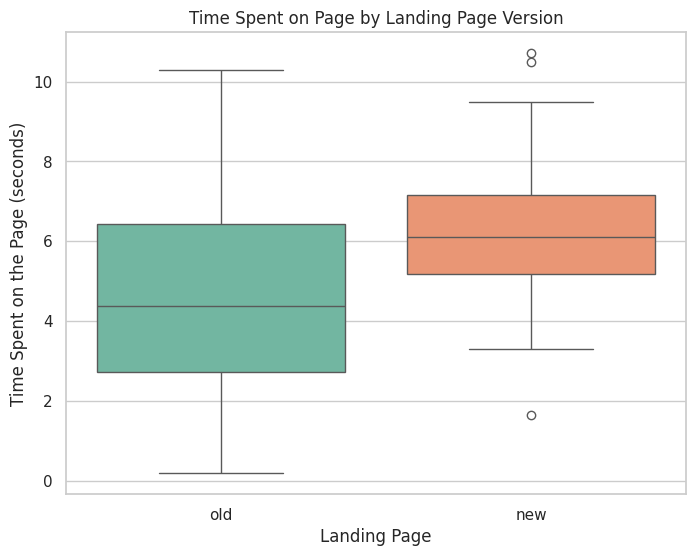

In [ ]:
# Create a box plot to compare time spent on old vs new landing pages
plt.figure(figsize=(8, 6))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=df, palette="Set2")
plt.title("Time Spent on Page by Landing Page Version")
plt.xlabel("Landing Page")
plt.ylabel("Time Spent on the Page (seconds)")
plt.show()



### Step 1: Define the null and alternate hypotheses



*   <b>Null Hypothesis</b>: There is no difference in the average time spend on the page between users who saw the old landing page and those that saw the new one.
*   <b>Alternative Hypothesis</b>: Users spend more time on the new landing page than the old one.



### Step 2: Select Appropriate test

This would require a one tailed t-test since were testing if the new page leads to more time spent.



### Step 3: Decide the significance level

Given the A/B test, we would select a significance level of 0.05

The benefits is that it


*   controls the rist of making a false positive Type 1 error
*   is sensitive enough to detect meaningful differences.



### Step 4: Collect and prepare data

In [ ]:
# Prepare data for testing conversion rates based on landing page

# Map 'converted' column to binary numeric values
df['converted_numeric'] = df['converted'].map({'yes': 1, 'no': 0})

# Group by landing page and calculate conversion rates
conversion_summary = df.groupby('landing_page')['converted_numeric'].agg(['count', 'sum', 'mean'])
conversion_summary.rename(columns={'count': 'Total Users', 'sum': 'Conversions', 'mean': 'Conversion Rate'}, inplace=True)

conversion_summary

Total Users  Conversions  Conversion Rate
landing_page                                           
new                    50           33             0.66
old                    50           21             0.42

### Step 5: Calculate the p-value

In [ ]:
#Calculate the P value
from statsmodels.stats.proportion import proportions_ztest

# Success counts for new and old landing pages
conversions = [33, 21]
samples = [50, 50]

# Perform z-test for proportions
z_stat, p_val = proportions_ztest(count=conversions, nobs=samples, alternative='larger')  # one-tailed test

z_stat, p_val

(np.float64(2.4077170617153842), np.float64(0.008026308204056278))

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Compare the p-value

# Example data: conversions and total users per landing page
conversions = [33, 21]  # [new, old]
samples = [50, 50]      # total users in each group

# Perform one-tailed z-test (testing if new > old)
z_stat, p_value = proportions_ztest(count=conversions, nobs=samples, alternative='larger')

# Print results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The new landing page converts significantly better.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion.")


Z-statistic: 2.4077170617153842
P-value: 0.008026308204056278
Reject the null hypothesis: The new landing page converts significantly better.


### Step 7:  Draw inference



*  Since 0.008 < 0.05, the p-value is less than α.

*  This means the observed difference in conversion rates is statistically significant.

*  We reject the null hypothesis and conclude that the new landing page performs better in terms of conversion.



**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
# Step 1: Define the number of conversions and sample sizes
conversions = [33, 21]  # [new, old]
samples = [50, 50]      # total users per group

# Step 2: Perform a one-tailed z-test
z_stat, p_value = proportions_ztest(count=conversions, nobs=samples, alternative='larger')

# Step 3: Define significance level
alpha = 0.05

# Step 4: Print results
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level: {alpha}")

# Step 5: Decision
if p_value < alpha:
    print("Reject the null hypothesis:")
    print("The conversion rate for the new page is significantly greater than the old page.")
else:
    print("Fail to reject the null hypothesis:")
    print("No significant difference in conversion rates.")

Z-statistic: 2.41
P-value: 0.0080
Significance Level: 0.05
Reject the null hypothesis:
The conversion rate for the new page is significantly greater than the old page.


## 3. Is the conversion and preferred language are independent or related?

In [ ]:
# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Step 2: Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output results
print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print(f"\nChi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis:")
    print("Conversion and preferred language are related.")
else:
    print("Fail to reject the null hypothesis:")
    print("Conversion and preferred language are independent.")

NameError: name 'chi2_contingency' is not defined

In [ ]:
# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Step 2: Perform Chi-Square Test
# Import the chi2_contingency function
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output results
print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print(f"\nChi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis:")
    print("Conversion and preferred language are related.")
else:
    print("Fail to reject the null hypothesis:")
    print("Conversion and preferred language are independent.")

Contingency Table:
converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18

Expected Frequencies:
converted              no    yes
language_preferred              
English             14.72  17.28
French              15.64  18.36
Spanish             15.64  18.36

Chi-square Statistic: 3.09
P-value: 0.2130
Degrees of Freedom: 2
Fail to reject the null hypothesis:
Conversion and preferred language are independent.


## 4. Is the time spent on the new page same for the different language users?

In [ ]:
from scipy.stats import f_oneway

# Filter data for users who landed on the new page
new_page_data = df[df['landing_page'] == 'new']

# Group time spent by language
english_time = new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page']
french_time = new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page']
spanish_time = new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(english_time, french_time, spanish_time)

f_stat, p_value

print("There is no statistically significant difference in the time spnet on the new page across different language users.")

There is no statistically significant difference in the time spnet on the new page across different language users.


## Conclusion and Business Recommendations

# New Section
## Conclusions


1.   <b>Users spend more time on the new landing page</b>
*   The average time spent increased significantly nearly 2 seconds
*   This suggests that the new content engages users more

2.   <b>New Landing Page has a higher conversion rate</b>
*   Conversion rate increased from 42% to 66%
*   This difference is statistically significant with p= 0.008

3.   <b>Preferred Language is not related to conversion</b>
*   No significant link between the user's language preference and conversion
*   Conversion decisions appear to be unrelated to language

4.   <b>Time spent on the new page is consistent across languages</b>
*   No difference in engagement time between English, French and Spanish
*   New design performs well across languages.

## Business Recommendations:
1. <b>Complete roll out of the new landing page</b>
*  It improves engagement and conversion with statistical significance. Consider A/B testing refinements to continue optimizing the design.
2. <b>Maintain language support</b>
*  While language doesn't affect conversions, maintaining support for major languages ensures user accessibility and inclusivity.
3. <b>Optimize for user engagement</b>
*  Place CTAs strategically, users spend more time on the new page. Highlight benefits and direct them to time-limited promotions.
4. <b>Explore further personalization</b>
*  Even though language doesn't impact conversation, future personalization or tailoring content to cultural or regional preferences could increase engagement.



___